# Import Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load Dataset

In [2]:
df = pd.read_csv('advertising.csv')

# Explore Dataset

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
print(df.describe(include='all'))

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

In [8]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Missing Values

In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.isna().sum() / len(df) * 100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# Data Cleaning

In [11]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [12]:
correlation = df.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Analysis of Outliers

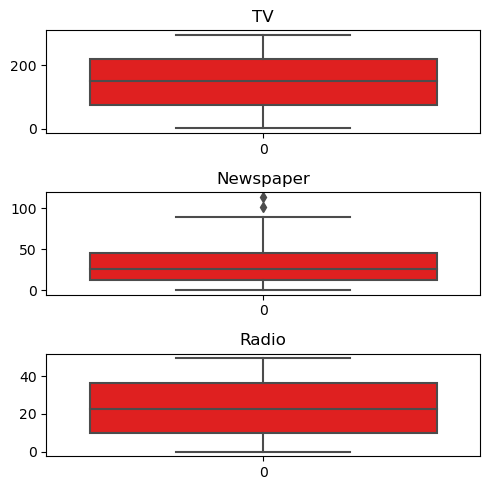

In [13]:
# Assuming 'df' is your DataFrame
fig, axs = plt.subplots(3, figsize=(5, 5))

# Boxplot for 'TV' with red color
plt1 = sns.boxplot(df['TV'], ax=axs[0], color='red')
plt1.set_title('TV')

# Boxplot for 'Newspaper' with red color
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1], color='red')
plt2.set_title('Newspaper')

# Boxplot for 'Radio' with red color
plt3 = sns.boxplot(df['Radio'], ax=axs[2], color='red')
plt3.set_title('Radio')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

# Analysis Sales

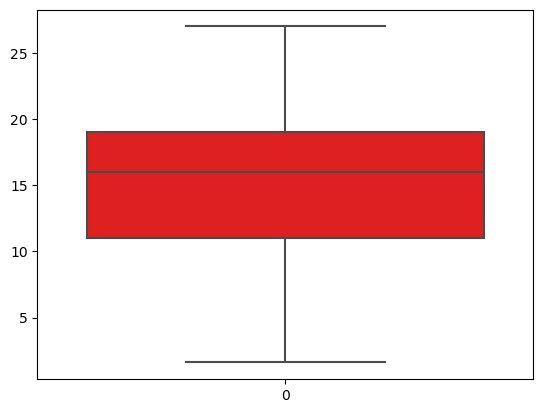

In [14]:
sns.boxplot(df['Sales'], color='red')
plt.show()

C:\Users\mdp12\AppData\Local\Temp\ipykernel_23488\1776533662.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], color='red')


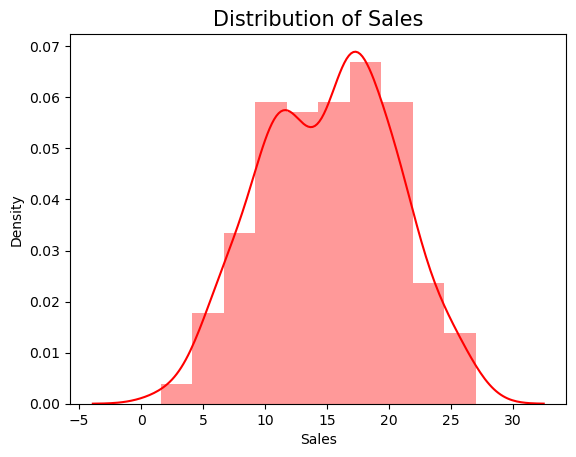

In [15]:
# Assuming 'df' is your DataFrame
sns.distplot(df['Sales'], color='red')

# Set the title of the plot
plt.title('Distribution of Sales', fontsize=15)

# Display the plot
plt.show()

C:\Users\mdp12\Desktop\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


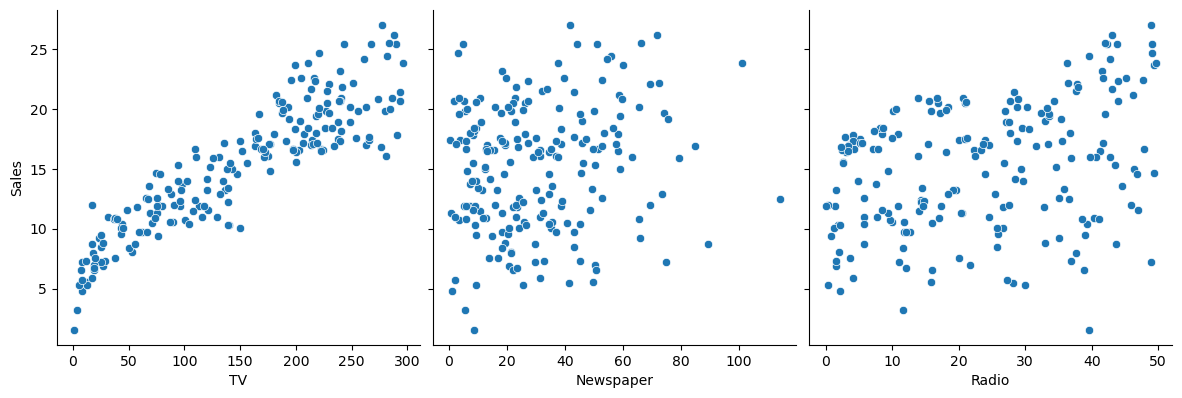

In [16]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Scatterplot Matrix

C:\Users\mdp12\Desktop\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


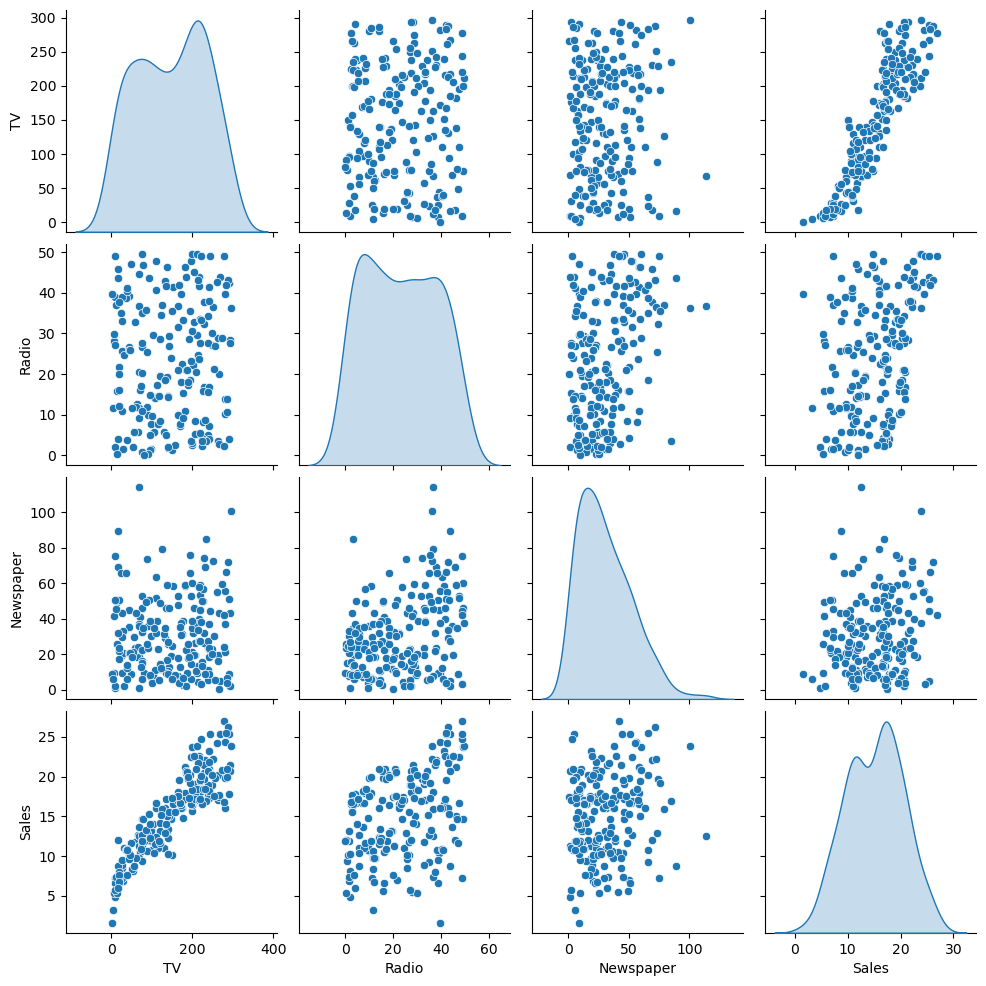

In [17]:
sns.pairplot(df , diag_kind='kde')

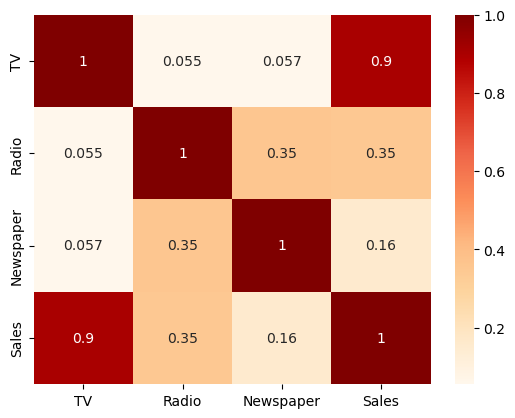

In [18]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="OrRd", annot = True)
plt.show()

# Model Building

In [19]:
X = df['TV']
y = df['Sales']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# Building a Linear Model

In [23]:
import statsmodels.api as sm

In [24]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [25]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        02:30:52   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.The coefficient for TV is 0.054, and its very low p-value indicates statistical significance, suggesting that the association is not merely coincidental.

2.The R-squared value is 0.816, signifying that 81.6% of the variance in Sales is accounted for by TV, which is considered a respectable R-squared value.

3.The F statistic's extremely low p-value implies that the model fit is statistically significant, affirming that the explained variance is not attributable solely to chance.

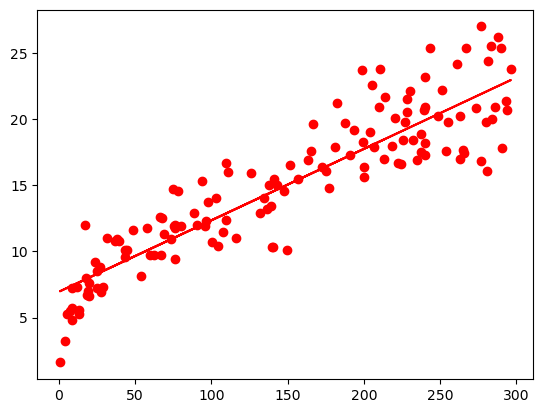

In [27]:
# Scatter plot of the training data with red color
plt.scatter(X_train, y_train, color='red')

# Plotting the linear regression line with red color
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r')

# Display the plot
plt.show()

# Assessing the model's performance is crucial for effective model evaluation.

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\mdp12\AppData\Local\Temp\ipykernel_23488\2559357461.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15, color='red')


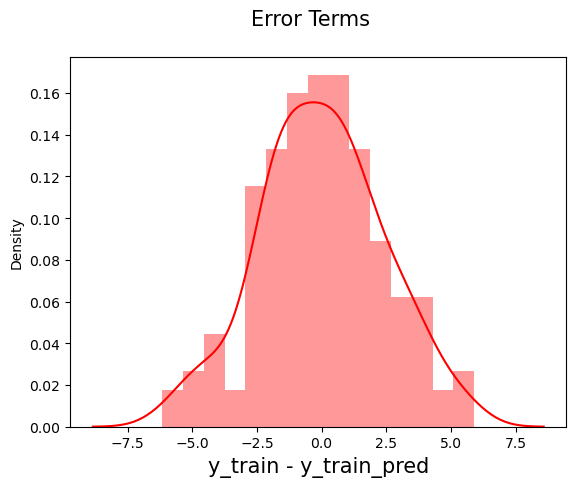

In [29]:
# Create a new figure
fig = plt.figure()

# Use Seaborn to create a distribution plot of the residuals with red color
sns.distplot(res, bins=15, color='red')

# Set the title of the plot
fig.suptitle('Error Terms', fontsize=15)

# Set the x-axis label
plt.xlabel('y_train - y_train_pred', fontsize=15)

# Display the plot
plt.show()

C:\Users\mdp12\Desktop\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

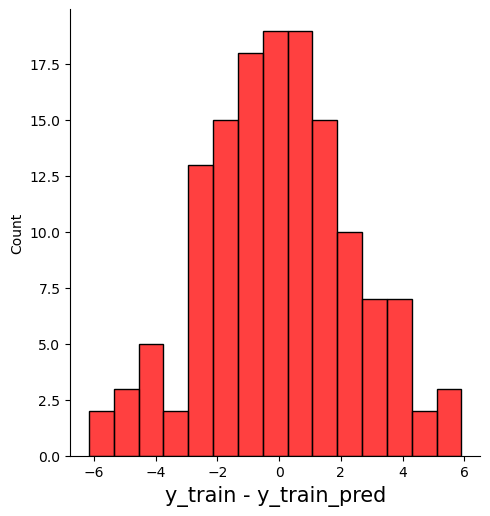

In [30]:
fig = plt.figure()

# Use Seaborn to create a distribution plot of the residuals with red color
sns.displot(res, bins=15, color='red')

fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)

plt.show()

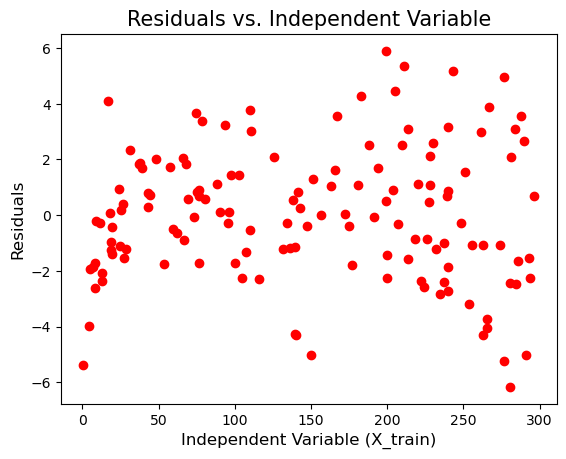

In [31]:
# Scatter plot of the independent variable (X_train) against residuals with red points
plt.scatter(X_train, res, color='red')

# Set the title of the plot
plt.title('Residuals vs. Independent Variable', fontsize=15)

# Set the x-axis label
plt.xlabel('Independent Variable (X_train)', fontsize=12)

# Set the y-axis label
plt.ylabel('Residuals', fontsize=12)

# Display the plot
plt.show()

# Predictions for the Test Set

In [32]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [33]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Printing the RMSE

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

Printing the R-squared value

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

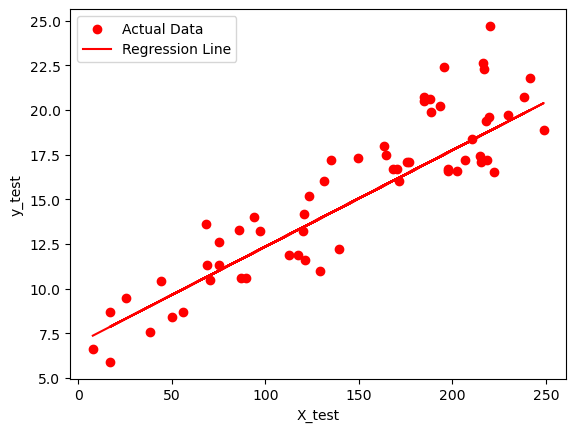

In [37]:
# Scatter plot of the test data in red
plt.scatter(X_test, y_test, color='red', label='Actual Data')

# Plotting the linear regression line in red
plt.plot(X_test, 6.948 + 0.054 * X_test, color='red', label='Regression Line')

# Adding labels for clarity
plt.xlabel('X_test')
plt.ylabel('y_test')

# Adding a legend
plt.legend()

# Display the plot
plt.show()